### 목표
- 1. LinearRegression 사용해보기
- 2. 가중치 변화에 따른 비용함수 값의 변화 그래프 시각화
- 3. 경사하강법으로 학습하는 SGDRegressor 사용해보기

#### 성적데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame([[2,20],[4,40],[8,80],[9,90]], index = ['지영','경은','혜원','나라'],
                   columns = ['시간','성적'])

data

,시간,성적
지영,2,20
경은,4,40
혜원,8,80
나라,9,90


#### 1. 수학 공식을 이용한 해석적 모델 
- LinearRegression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# 모델 객체 생성
linear_model = LinearRegression()

In [5]:
# 모델 학습
linear_model.fit(data[['시간']],data['성적']) # 문제데이터는 2차원

LinearRegression()

- y = 10x + 0

In [6]:
# 가중치와 절편 확인
print(linear_model.coef_) # 가중치
print(linear_model.intercept_) # 절편

[10.]
7.105427357601002e-15


#### 2. 경사하강법
- 가중치(w)변화에 따른 비용함수(cost) 값의 변화 그래프

In [7]:
# 가설 함수
def h(w,x): 
    return w*x + 0

In [8]:
# 비용함수 
def cost(data, target, weight): # mse
    y_pre = h(weight,data) # 예측값
    return ((y_pre - target) **2).mean() # cost값 == mse값

In [9]:
cost(data['시간'],data['성적'],5)

1031.25

In [10]:
cost(data['시간'],data['성적'],7)

371.25

In [11]:
cost(data['시간'],data['성적'],10)

0.0

In [12]:
cost(data['시간'],data['성적'],13)

371.25

In [13]:
cost(data['시간'],data['성적'],20)

4125.0

In [14]:
w_range = range(-10,31)

In [15]:
cost_list = []
for w in w_range:
    c = cost(data['시간'],data['성적'],w)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

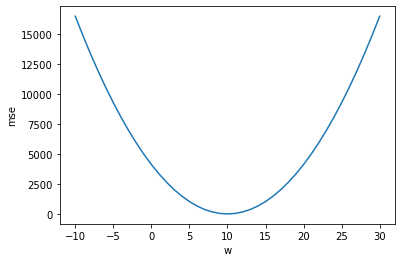

In [16]:
plt.plot(w_range,cost_list)
plt.xlabel('w')
plt.ylabel('mse')
plt.show()

- SGDRegressor 사용하기

In [17]:
from sklearn.linear_model import SGDRegressor # 경사하강법

In [26]:
# max_iter = 가중치 업데이트 반복 횟수(epochs)
# eta0 = 학습률 설정(learning rate)
# verbose = 학습 현황 출력 여부 (1==True)
sgd_model = SGDRegressor(max_iter = 5000,
                        eta0 = 0.001,
                        verbose = 1)


In [27]:
# 학습
sgd_model.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 1.22, NNZs: 1, Bias: 0.174728, T: 4, Avg. loss: 1895.163278
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.07, NNZs: 1, Bias: 0.295497, T: 8, Avg. loss: 1483.501239
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.77, NNZs: 1, Bias: 0.392796, T: 12, Avg. loss: 1211.706916
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.35, NNZs: 1, Bias: 0.474750, T: 16, Avg. loss: 1008.725576
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.86, NNZs: 1, Bias: 0.545595, T: 20, Avg. loss: 850.887889
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.30, NNZs: 1, Bias: 0.607879, T: 24, Avg. loss: 724.237260
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.70, NNZs: 1, Bias: 0.663189, T: 28, Avg. loss: 621.042979
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.06, NNZs: 1, Bias: 0.712816, T: 32, Avg. loss: 535.575046
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.38, NNZs: 1, Bias: 0.757547, T: 36, Avg. loss: 464.211229
Total training time: 0.00

SGDRegressor(eta0=0.001, max_iter=5000, verbose=1)

In [28]:
# 최적의 w, b 확인
print('가중치:', sgd_model.coef_)
print('절편:', sgd_model.intercept_)

가중치: [9.79193163]
절편: [1.34298578]


In [29]:
# 예측
sgd_model.predict([[7]])

array([69.88650716])